In [1]:
# Final version of model-based and data driven approach code
# Turki Haj Mohamad 9/12/2020

feature shape (839, 24)
target shape (839, 1)
speed shape: (839, 1)
[0 1 2]
24
Features sorted by their score:
[(0.1004, 'SOM_{21}'), (0.0867, 'SOM_{22}'), (0.0833, 'crsEn_2(0.05)'), (0.0824, 'crsEn_1(0.1)'), (0.0671, 'Skewness'), (0.0511, 'POD \theta_2'), (0.0503, 'crsEn_2(0.1)'), (0.0498, 'POM_{21}'), (0.0477, 'crsEn_1(0.05)'), (0.0475, 'POM_{22}'), (0.0469, 'POD \theta_1'), (0.0447, 'SOM_{12}'), (0.0426, 'NA4*'), (0.0411, 'POM_{11}'), (0.0329, 'POM_{12}'), (0.0313, 'SOM_{11}'), (0.0305, 'Kurtosis'), (0.0245, 'MSE'), (0.0084, 'SOV_{2}'), (0.0075, 'SOD \theta_1'), (0.0074, 'SOV_{1}'), (0.0073, 'SOD \theta_2'), (0.0048, 'POV_{2}'), (0.004, 'POV_{1}')]
0.9855595667870036


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Glyph 9 missing from current font.
Glyph 9 missing from current font.


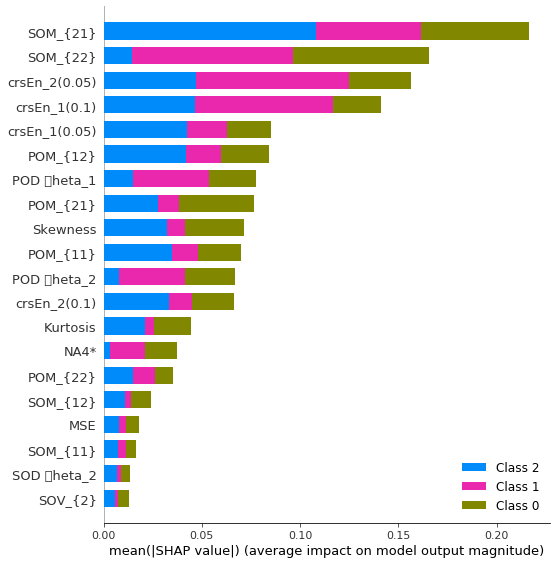

shape of shap values: (3, 277, 24)
shape of shap values: (num_class,num_samples,num_feat)


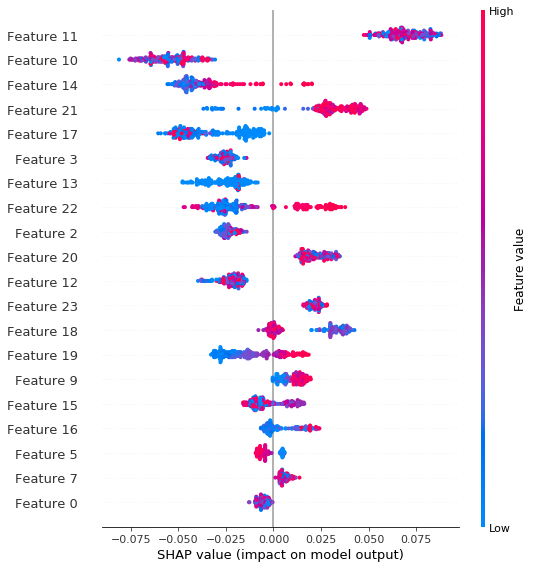

(277, 24)
(24,)
[0.00187939 0.00233774 0.00378979 0.00401024 0.00435258 0.00451604
 0.00544297 0.00591045 0.0080368  0.01168217 0.01243997 0.01477066
 0.02204339 0.02230079 0.0232692  0.02385438 0.02551055 0.0257664
 0.02809131 0.0283151  0.04704666 0.05210768 0.05524446 0.07214993]
         col_name  feature_importance_vals
10       SOM_{21}                 0.072150
11       SOM_{22}                 0.055244
21  crsEn_2(0.05)                 0.052108
22   crsEn_1(0.1)                 0.047047
20  crsEn_1(0.05)                 0.028315
13       POM_{12}                 0.028091
2    POD \theta_1                 0.025766
14       POM_{21}                 0.025511
17       Skewness                 0.023854
12       POM_{11}                 0.023269
3    POD \theta_2                 0.022301
23   crsEn_2(0.1)                 0.022043
18       Kurtosis                 0.014771
19           NA4*                 0.012440
15       POM_{22}                 0.011682
9        SOM_{12}           

In [21]:
# import libraries
import scipy.io
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score


# data loading

# insert filename
filename = 'Data_t2_v2_20505_32feat_839ex.mat'

# select wanted condition
cond2study =1 # 

# random state of random forrest
nn_ =50

# slect numbr of features (should be updated to a feature set)
num_fea = 24

# Loading all the data as data dictionary (featureset target & speed)
input_mat = scipy.io.loadmat(filename)

# print(input_mat.keys())


# select input, speed, target from the data dictionary
Feat_mat = input_mat['Feat_mat'][:,:num_fea]
Target_vec = input_mat['Target_vec']
speed_vec = input_mat['speed_vec']

# Feat_mat = Feat_mat[:,0:24]
print('feature shape',Feat_mat.shape)
print('target shape',Target_vec.shape)
print('speed shape:', speed_vec.shape)


# fix dimensionality (shape)
Target_vec = Target_vec.reshape((Target_vec.shape[0],))

# find target/feature vec/mat that match the selected condition
# Target_vec_new = Target_vec[(Target_vec==0)|(Target_vec==cond2study)].copy()
# print('target shape:',Target_vec_new.shape)

# Feat_mat = Feat_mat[(Target_vec==0)|(Target_vec==cond2study),:].copy()
# print('feature shape:',Feat_mat.shape)

# Target_vec = Target_vec_new.copy()

# represent target 'condition' by 0 & 1
# if cond2study ==2:
#     Target_vec[Target_vec==cond2study]=1

print(np.unique(Target_vec))

    
# features names

# names = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19']
# names2 = ['SOD \theta1','SOD \theta2','POD_theta1','POD_theta2','SOV1','SOV2','POV1','POV2','PHI11','PHI12','PHI21','PHI22','POM11','POM12','POM21','POM22','MeanSqErr','ResSkew','ResKurt','NA4star']

# names3 = np.arange(0,25).astype('str')
# names5 = ['SOD \theta1','SOD \theta2','POD \theta1','POD \theta2','SOV1','SOV2','POV1','POV2','PHI11','PHI12','PHI21','PHI22','POM11','POM12','POM21','POM22','MSE','Skewness','Kurtosis','NA4*','crsEn_1 0.05','crsEn_2 0.05','crsEn_1 0.1','crsEn_2 0.1']
# names5 = ['SOD_theta1','SOD_theta2','POD_theta1','POD_theta2','SOV1','SOV2','POV1','POV2','PHI11','PHI12','PHI21','PHI22','POM11','POM12','POM21','POM22','MeanSqErr','ResSkew','ResKurt','NA4star','eDD_p05_1','eDD_p05_2','eDD_p05_3','eDD_p1_1','eDD_p1_2','eDD_p1_3','eDD_p06_1','eDD_p06_2','eDD_p06_3','eDD_p18_1','eDD_p18_2','eDD_p18_3']



names_DB = ['SOD \theta_1','SOD \theta_2','POD \theta_1','POD \theta_2','SOV_{1}','SOV_{2}','POV_{1}','POV_{2}','SOM_{11}','SOM_{12}','SOM_{21}','SOM_{22}','POM_{11}','POM_{12}','POM_{21}','POM_{22}']
names_MB = ['MSE','Skewness','Kurtosis','NA4*','crsEn_1(0.05)','crsEn_2(0.05)','crsEn_1(0.1)','crsEn_2(0.1)']            
names_hy = names_DB+names_MB


print(len(names_hy))  
    
# data is ready    
    
#___________________________________________Random Forrest Model_____________________________________________________
    
# devide data    
X = Feat_mat
y = Target_vec



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# rf = RandomForestClassifier(min_samples_split=10,max_depth=5)
rf = RandomForestClassifier(random_state=nn_)

rf.fit(X_train, y_train)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names_hy), reverse=True))


# import pandas as pd
# XXX = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names4), reverse=True)
# pd.DataFrame(XXX)

y_pred = rf.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score 
confusion_matrix(y_test,y_pred)


print(accuracy_score(y_test,y_pred))
# print(precision_score(y_test,y_pred))
# print(recall_score(y_test,y_pred))


# random forrest model is ready

#________________________________________________SHAP feature ranking___________________________________________________

import shap
fig = plt.figure()
shap_values = shap.TreeExplainer(rf).shap_values(X_test[:,feat_set])
shap.summary_plot(shap_values, X_train, plot_type="bar",feature_names=names_hy)

plt.show()
# fig.savefig('summary_plot.png')

print('shape of shap values:', np.array(shap_values).shape)
print('shape of shap values:','(num_class,num_samples,num_feat)')

class2show = 0
shap.summary_plot(shap_values[class2show], X_test[:,feat_set])

#___________________________________________________SHAP values_____________________________________________________

import pandas as pd
vals= np.abs(shap_values).mean(0)
# vals1= np.abs(np.array(shap_values)[0,:,:]).mean(0)
# vals2= np.abs(np.array(shap_values)[1,:,:]).mean(0)

print(np.abs(shap_values).mean(0).shape)
print(np.mean(vals,axis=0).shape)
# print(np.sort(vals1))
# print(np.sort(vals2))
print(np.sort(np.mean(vals,axis=0)))





feature_importance_hy = pd.DataFrame(list(zip(names_hy, np.mean(vals,axis=0))), columns=['col_name','feature_importance_vals'])
# feature_importance = pd.DataFrame( vals.reshape(-1,2))#, columns=['col_name','feature_importance_vals'])
feature_importance_hy.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
print(feature_importance_hy)



#___________________________________________using ranked features______________________________________

feat_set = []
accuracy_score_ =[]
precision_score_ =[]
recall_score_ =[]
c=0
for x in feature_importance_hy.index:
    feat_set.append(x)
    print('feature set:',feat_set)
    rf = RandomForestClassifier()
#     svc1= SVC()
# svc1.fit(X_train[:,1].reshape(-1, 1), y_train)
#     svc1.fit(X_train[:,feat_set], y_train)
#     y_pred = svc1.predict(X_test[:,feat_set])
    rf.fit(X_train[:,feat_set], y_train)
    y_pred = rf.predict(X_test[:,feat_set])

    accuracy_score_.append(accuracy_score(y_test,y_pred))
#     precision_score_.append(precision_score(y_test,y_pred))
#     recall_score_.append(recall_score(y_test,y_pred))
    
    print('acc:',accuracy_score(y_test,y_pred))
#     print('precision:',precision_score(y_test,y_pred))
#     print('recall:',recall_score(y_test,y_pred)) 
    cf=confusion_matrix(y_test,y_pred)
    print('confusion matrix:\n',cf)
    